group7_homelessness.ipynb

Team: Rounak Sethia, James Krepelka, Mike Murtey

CSCI 611 - Final Project

SOURCES: *see summary report*

DEV/TEST ENV: Google Colab

DESCRIPTION: Determining the importance of societal and environmental factors on homelessness in the US via Random Forest

**STEPS FOR SETTING UP DATA TO RUN**
1. Download group7_data.zip
2. Extract the zip into a new folder locally.
3. Use "Upload to session storage" button in Colab.
4. Select **all files** in extracted folder.
5. Run all!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Data Stuff

## Weather Data

In [2]:
weather_raw = pd.read_csv("STATES_weather.csv")
weather_raw

,Unnamed: 0,year,city_name,hdd,cdd
0,0,2000,AK,13225,24
1,1,2001,AK,13610,25
2,2,2002,AK,12294,69
3,3,2003,AK,12875,36
4,4,2004,AK,12851,113
...,...,...,...,...,...
1095,17,2017,WY,8354,576
1096,18,2018,WY,8668,568
1097,19,2019,WY,9468,504
1098,20,2020,WY,8586,686


In [3]:
weather = weather_raw.rename(columns={"year": "Year", "city_name":"State"})
weather = weather[['State', 'Year', 'hdd', 'cdd']]
weather

,State,Year,hdd,cdd
0,AK,2000,13225,24
1,AK,2001,13610,25
2,AK,2002,12294,69
3,AK,2003,12875,36
4,AK,2004,12851,113
...,...,...,...,...
1095,WY,2017,8354,576
1096,WY,2018,8668,568
1097,WY,2019,9468,504
1098,WY,2020,8586,686


In [4]:
weather[weather["Year"] == 2018]

,State,Year,hdd,cdd
18,AK,2018,11618,65
40,AL,2018,2258,2428
62,AR,2018,3663,2056
84,AZ,2018,3596,1391
106,CA,2018,2143,2552
128,CO,2018,11946,0
150,CT,2018,6037,825
172,DE,2018,4361,1479
194,FL,2018,558,3764
216,GA,2018,1968,2650


## Median Contract Rent

In [5]:
mcr_raw = pd.read_csv("Median Contract Rent (USD) - American Community Survey - Median Contract Rent (ACS).csv")
mcr_raw

,Year,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,PR
0,2020,600,"1,122",924,579,"1,442","1,217","1,023",979,"1,517",...,708,915,958,877,"1,088","1,202",543,741,734,383
1,2019,581,"1,126",881,557,"1,377","1,158",995,956,"1,444",...,676,875,906,865,"1,057","1,126",536,724,731,375
2,2018,562,"1,117",843,540,"1,309","1,078",973,933,"1,398",...,647,832,862,846,"1,015","1,051",523,703,715,368
3,2017,544,"1,091",810,527,"1,227",994,944,897,"1,330",...,625,789,822,821,981,973,506,682,698,362
4,2016,533,"1,059",782,511,"1,181",929,917,865,"1,264",...,609,751,791,793,955,920,490,664,686,358
5,2015,520,"1,030",760,498,"1,149",880,895,845,"1,234",...,591,722,768,778,936,883,474,651,674,355
6,2014,511,"1,012",753,492,"1,138",848,890,840,"1,211",...,581,707,755,766,926,868,461,648,663,357
7,2013,501,978,747,480,"1,119",825,880,828,"1,154",...,568,688,739,754,910,853,448,636,647,351
8,2012,488,950,742,468,"1,110",802,867,812,"1,113",...,557,666,721,734,885,833,436,624,618,344
9,2011,469,913,742,455,"1,083",771,845,802,"1,043",...,541,651,707,725,856,806,422,614,591,336


In [6]:
mcr = mcr_raw.melt(['Year'], var_name="State", value_name="Median Contract Rent")
mcr

,Year,State,Median Contract Rent
0,2020,AL,600
1,2019,AL,581
2,2018,AL,562
3,2017,AL,544
4,2016,AL,533
...,...,...,...
567,2014,PR,357
568,2013,PR,351
569,2012,PR,344
570,2011,PR,336


## HIC Data

In [7]:
hic_2019 = pd.read_csv("2007-2021-HIC-Counts-by-State.2019.csv",skiprows=1)
hic_2018 = pd.read_csv("2007-2021-HIC-Counts-by-State.2018.csv",skiprows=1)
hic_2017 = pd.read_csv("2007-2021-HIC-Counts-by-State.2017.csv",skiprows=1)
hic_2016 = pd.read_csv("2007-2021-HIC-Counts-by-State.2016.csv",skiprows=1)
hic_2015 = pd.read_csv("2007-2021-HIC-Counts-by-State.2015.csv",skiprows=1)
hic_2014 = pd.read_csv("2007-2021-HIC-Counts-by-State.2014.csv",skiprows=1)
hic_2013 = pd.read_csv("2007-2021-HIC-Counts-by-State.2013.csv",skiprows=1)
hic_2012 = pd.read_csv("2007-2021-HIC-Counts-by-State.2012.csv",skiprows=1)
hic_2011 = pd.read_csv("2007-2021-HIC-Counts-by-State.2011.csv",skiprows=1)
hic_2010 = pd.read_csv("2007-2021-HIC-Counts-by-State.2010.csv",skiprows=1)

In [8]:
hic_2019['Year'] = 2019
hic_2018['Year'] = 2018
hic_2017['Year'] = 2017
hic_2016['Year'] = 2016
hic_2015['Year'] = 2015
hic_2014['Year'] = 2014
hic_2013['Year'] = 2013
hic_2013['Total Year-Round Beds (ES, TH, SH)'] = hic_2013['Total Year-Round Beds (ES,TH,RRH,SH)']
hic_2013['Total Year-Round Beds (ES)'] = hic_2013['Total Year-Round ES Beds']
hic_2013['Total Year-Round Beds (TH)'] = hic_2013['Total Year-Round TH Beds']
hic_2013['Total Year-Round Beds (SH)'] = hic_2013['Total Year-Round SH Beds']
hic_2012['Year'] = 2012
hic_2012['Total Year-Round Beds (ES, TH, SH)'] = hic_2012['Total Year-Round Beds (ES,TH,SH)']
hic_2012['Total Year-Round Beds (ES)'] = hic_2012['Total Year-Round ES Beds']
hic_2012['Total Year-Round Beds (TH)'] = hic_2012['Total Year-Round TH Beds']
hic_2012['Total Year-Round Beds (SH)'] = hic_2012['Total Year-Round SH Beds']
hic_2011['Year'] = 2011
hic_2011['Total Year-Round Beds (ES, TH, SH)'] = hic_2011['Total Year-Round Beds (ES,TH,SH)']
hic_2011['Total Year-Round Beds (ES)'] = hic_2011['Total Year-Round ES Beds']
hic_2011['Total Year-Round Beds (TH)'] = hic_2011['Total Year-Round TH Beds']
hic_2011['Total Year-Round Beds (SH)'] = hic_2011['Total Year-Round SH Beds']
hic_2010['Year'] = 2010
hic_2010['Total Year-Round Beds (ES, TH, SH)'] = hic_2010['Total Year-Round Beds (ES,TH,SH)']
hic_2010['Total Year-Round Beds (ES)'] = hic_2010['Total Year-Round ES Beds']
hic_2010['Total Year-Round Beds (TH)'] = hic_2010['Total Year-Round TH Beds']
hic_2010['Total Year-Round Beds (SH)'] = hic_2010['Total Year-Round SH Beds']

hic_all_raw = pd.concat([hic_2019, hic_2018, hic_2017, hic_2016, hic_2015, hic_2014, hic_2013, hic_2012, hic_2011, hic_2010])

In [9]:
bad_states = ['AS', 'DC', 'PR', 'GU', 'VI', 'Total']  # Drop territories and total
hic_all = hic_all_raw[~hic_all_raw['State'].isin(bad_states)]
hic_all = hic_all[['State', 'Year', 'Total Year-Round Beds (ES)','Total Year-Round Beds (TH)','Total Year-Round Beds (SH)','Total Year-Round Beds (ES, TH, SH)']]

hic_all

,State,Year,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)"
0,AK,2019,1374,504,0,1878
1,AL,2019,1937,730,34,2701
2,AR,2019,1497,420,0,1917
3,AZ,2019,3787,2713,68,6568
4,CA,2019,31028,14969,309,46306
...,...,...,...,...,...,...
49,VT,2010,395,385,6,786
50,WA,2010,"6,144","11,871",56,"18,071"
51,WI,2010,"2,992","2,952",64,"6,008"
52,WV,2010,"1,244",746,12,"2,002"


## PIT Data

In [10]:
pit_2019_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2019.csv")
pit_2018_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2018.csv")
pit_2017_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2017.csv")
pit_2016_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2016.csv")
pit_2015_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2015.csv")
pit_2014_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2014.csv")
pit_2013_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2013.csv")
pit_2012_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2012.csv")
pit_2011_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2011.csv")
pit_2010_raw = pd.read_csv("2007-2021-PIT-Counts-by-State.2010.csv")

In [11]:
pit_2019 = pit_2019_raw[['State', 'Overall Homeless, 2019']]
pit_2019['Year'] = 2019
pit_2019 = pit_2019.rename(columns={"Overall Homeless, 2019": "Overall Homeless"})
pit_2018 = pit_2018_raw[['State', 'Overall Homeless, 2018']]
pit_2018['Year'] = 2018
pit_2018 = pit_2018.rename(columns={"Overall Homeless, 2018": "Overall Homeless"})
pit_2017 = pit_2017_raw[['State', 'Overall Homeless, 2017']]
pit_2017['Year'] = 2017
pit_2017 = pit_2017.rename(columns={"Overall Homeless, 2017": "Overall Homeless"})
pit_2016 = pit_2016_raw[['State', 'Overall Homeless, 2016']]
pit_2016['Year'] = 2016
pit_2016 = pit_2016.rename(columns={"Overall Homeless, 2016": "Overall Homeless"})
pit_2015 = pit_2015_raw[['State', 'Overall Homeless, 2015']]
pit_2015['Year'] = 2015
pit_2015 = pit_2015.rename(columns={"Overall Homeless, 2015": "Overall Homeless"})
pit_2014 = pit_2014_raw[['State', 'Overall Homeless, 2014']]
pit_2014['Year'] = 2014
pit_2014 = pit_2014.rename(columns={"Overall Homeless, 2014": "Overall Homeless"})
pit_2013 = pit_2013_raw[['State', 'Overall Homeless, 2013']]
pit_2013['Year'] = 2013
pit_2013 = pit_2013.rename(columns={"Overall Homeless, 2013": "Overall Homeless"})
pit_2012 = pit_2012_raw[['State', 'Overall Homeless, 2012']]
pit_2012['Year'] = 2012
pit_2012 = pit_2012.rename(columns={"Overall Homeless, 2012": "Overall Homeless"})
pit_2011 = pit_2011_raw[['State', 'Overall Homeless, 2011']]
pit_2011['Year'] = 2011
pit_2011 = pit_2011.rename(columns={"Overall Homeless, 2011": "Overall Homeless"})
pit_2010 = pit_2010_raw[['State', 'Overall Homeless, 2010']]
pit_2010['Year'] = 2010
pit_2010 = pit_2010.rename(columns={"Overall Homeless, 2010": "Overall Homeless"})

pit_all_raw = pd.concat([pit_2019, pit_2018, pit_2017, pit_2016, pit_2015, pit_2014, pit_2013, pit_2012, pit_2011, pit_2010])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [12]:
bad_states = ['AS', 'DC', 'PR', 'GU', 'VI', 'Total']  # Drop territories and total
pit_all = pit_all_raw[~pit_all_raw['State'].isin(bad_states)]

pit_all = pit_all.reset_index(drop=True)
pit_all['Overall Homeless'] = pit_all['Overall Homeless'].str.replace(',','')
pit_all = pit_all[pit_all['Overall Homeless'] != " "]
pit_all['Overall Homeless'] = pit_all['Overall Homeless'].astype(int)
pit_all = pit_all.reset_index(drop=True)
pit_all

,State,Overall Homeless,Year
0,AK,1907,2019
1,AL,3261,2019
2,AR,2717,2019
3,AZ,10007,2019
4,CA,151278,2019
...,...,...,...
498,VT,1220,2010
499,WA,22878,2010
500,WI,6333,2010
501,WV,2264,2010


## Pop Data

In [13]:
pop_raw = pd.read_csv("dfpop.csv")
pop_raw.rename(columns={pop_raw.columns[0]: "Year" }, inplace = True)
pop_raw

,Year,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,2010,4785437,713910,6407172,2921964,37319502,5047349,3579114,899593,18845537,...,816166,6355311,25241971,2775332,625879,8023699,6742830,1854239,5690475,564487
1,2011,4799069,722128,6472643,2940667,37638369,5121108,3588283,907381,19053237,...,823579,6399291,25645629,2814384,627049,8101155,6826627,1856301,5705288,567299
2,2012,4815588,730443,6554978,2952164,37948800,5192647,3594547,915179,19297822,...,833566,6453898,26084481,2853375,626090,8185080,6897058,1856872,5719960,576305
3,2013,4830081,737068,6632764,2959400,38260787,5269035,3594841,923576,19545621,...,842316,6494340,26480266,2897640,626210,8252427,6963985,1853914,5736754,582122
4,2014,4841799,736283,6730413,2967392,38596972,5350101,3594524,932487,19845911,...,849129,6541223,26964333,2936879,625214,8310993,7054655,1849489,5751525,582531
5,2015,4852347,737498,6829676,2978048,38918045,5450623,3587122,941252,20209042,...,853988,6591170,27470056,2981835,625216,8361808,7163657,1842050,5760940,585613
6,2016,4863525,741456,6941072,2989918,39167117,5539215,3578141,948921,20613477,...,862996,6646010,27914410,3041868,623657,8410106,7294771,1831023,5772628,584215
7,2017,4874486,739700,7044008,3001345,39358497,5611885,3573297,956823,20963613,...,872868,6708799,28295273,3101042,624344,8463587,7423362,1817004,5790186,578931
8,2018,4887681,735139,7158024,3009733,39461588,5691287,3571520,965479,21244317,...,878698,6771631,28628666,3153550,624358,8501286,7523869,1804291,5807406,577601
9,2019,4903185,731545,7278717,3017804,39512223,5758736,3565287,973764,21477737,...,884659,6829174,28995881,3205958,623989,8535519,7614893,1792147,5822434,578759


In [14]:
pop = pop_raw.melt(['Year'], var_name="State", value_name="Total Population")
pop

,Year,State,Total Population
0,2010,AL,4785437
1,2011,AL,4799069
2,2012,AL,4815588
3,2013,AL,4830081
4,2014,AL,4841799
...,...,...,...
495,2015,WY,585613
496,2016,WY,584215
497,2017,WY,578931
498,2018,WY,577601


## Merging things

In [15]:
homeless_pop = pd.merge(pop, pit_all, on=['Year','State'])

homeless_pop['Percent Homeless Population'] = homeless_pop['Overall Homeless'] / homeless_pop['Total Population']*100
homeless_pop

,Year,State,Total Population,Overall Homeless,Percent Homeless Population
0,2010,AL,4785437,6046,0.126342
1,2011,AL,4799069,5558,0.115814
2,2012,AL,4815588,5209,0.108170
3,2013,AL,4830081,4689,0.097079
4,2014,AL,4841799,4561,0.094201
...,...,...,...,...,...
495,2015,WY,585613,798,0.136267
496,2016,WY,584215,857,0.146693
497,2017,WY,578931,873,0.150795
498,2018,WY,577601,639,0.110630


In [16]:
homeless_res = pd.merge(homeless_pop, hic_all, on=['Year','State'])
homeless_res

,Year,State,Total Population,Overall Homeless,Percent Homeless Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)"
0,2010,AL,4785437,6046,0.126342,"1,662","2,525",34,"4,221"
1,2011,AL,4799069,5558,0.115814,"1,830","2,633",34,"4,497"
2,2012,AL,4815588,5209,0.108170,"2,016","2,247",34,"4,297"
3,2013,AL,4830081,4689,0.097079,1943,2095,34,4077
4,2014,AL,4841799,4561,0.094201,1838,1852,34,3724
...,...,...,...,...,...,...,...,...,...
495,2015,WY,585613,798,0.136267,450,403,0,853
496,2016,WY,584215,857,0.146693,511,301,0,812
497,2017,WY,578931,873,0.150795,361,337,0,698
498,2018,WY,577601,639,0.110630,345,215,0,560


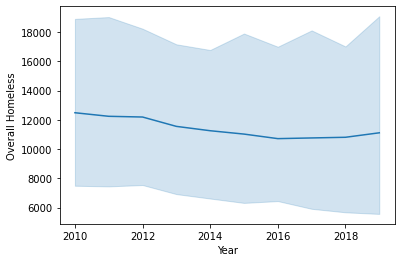

In [17]:
sns.lineplot(data=homeless_res, x="Year", y="Overall Homeless")

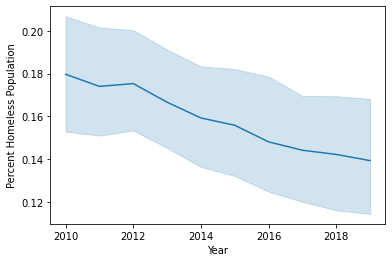

In [18]:
sns.lineplot(data=homeless_res, x="Year", y="Percent Homeless Population")

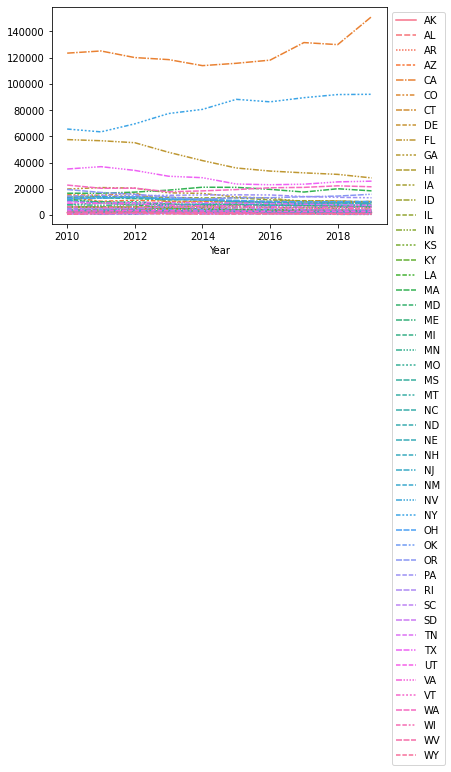

In [19]:
hm_wide = homeless_res.pivot("Year", "State", "Overall Homeless")
# sns.lineplot(data=hm_wide, legend=False)
sns.lineplot(data=hm_wide)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

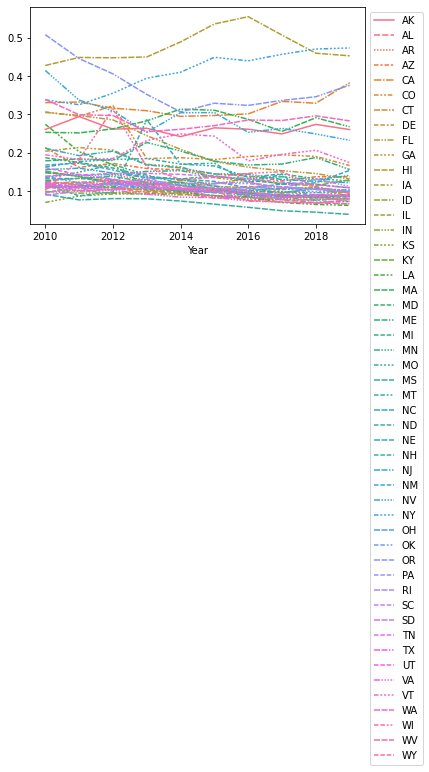

In [20]:
hm_wide = homeless_res.pivot("Year", "State", "Percent Homeless Population")
# sns.lineplot(data=hm_wide, legend=False)
sns.lineplot(data=hm_wide)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [21]:
housing_res = pd.merge(homeless_res, mcr, on=['Year','State'])
housing_res

,Year,State,Total Population,Overall Homeless,Percent Homeless Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent
0,2010,AL,4785437,6046,0.126342,"1,662","2,525",34,"4,221",452
1,2011,AL,4799069,5558,0.115814,"1,830","2,633",34,"4,497",469
2,2012,AL,4815588,5209,0.108170,"2,016","2,247",34,"4,297",488
3,2013,AL,4830081,4689,0.097079,1943,2095,34,4077,501
4,2014,AL,4841799,4561,0.094201,1838,1852,34,3724,511
...,...,...,...,...,...,...,...,...,...,...
495,2015,WY,585613,798,0.136267,450,403,0,853,674
496,2016,WY,584215,857,0.146693,511,301,0,812,686
497,2017,WY,578931,873,0.150795,361,337,0,698,698
498,2018,WY,577601,639,0.110630,345,215,0,560,715


In [22]:
housing_weather_res_raw = pd.merge(housing_res, weather, on=['Year','State'])
housing_weather_res_raw

,Year,State,Total Population,Overall Homeless,Percent Homeless Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
0,2010,AL,4785437,6046,0.126342,"1,662","2,525",34,"4,221",452,2936,2712
1,2011,AL,4799069,5558,0.115814,"1,830","2,633",34,"4,497",469,2232,2530
2,2012,AL,4815588,5209,0.108170,"2,016","2,247",34,"4,297",488,1749,2392
3,2013,AL,4830081,4689,0.097079,1943,2095,34,4077,501,2204,2196
4,2014,AL,4841799,4561,0.094201,1838,1852,34,3724,511,2668,2196
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2015,WY,585613,798,0.136267,450,403,0,853,674,7853,515
496,2016,WY,584215,857,0.146693,511,301,0,812,686,8181,605
497,2017,WY,578931,873,0.150795,361,337,0,698,698,8354,576
498,2018,WY,577601,639,0.110630,345,215,0,560,715,8668,568


### Typing

In [23]:
housing_weather_res = housing_weather_res_raw
housing_weather_res.replace(',','', regex=True, inplace=True)
housing_weather_res['Total Year-Round Beds (ES)'] = housing_weather_res['Total Year-Round Beds (ES)'].astype(int)
housing_weather_res['Total Year-Round Beds (TH)'] = housing_weather_res['Total Year-Round Beds (TH)'].astype(int)
housing_weather_res['Total Year-Round Beds (SH)'] = housing_weather_res['Total Year-Round Beds (SH)'].astype(int)
housing_weather_res['Total Year-Round Beds (ES, TH, SH)'] = housing_weather_res['Total Year-Round Beds (ES, TH, SH)'].astype(int)
housing_weather_res['Median Contract Rent'] = housing_weather_res['Median Contract Rent'].astype(int)
housing_weather_res = housing_weather_res.reset_index(drop=True)
housing_weather_res

,Year,State,Total Population,Overall Homeless,Percent Homeless Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
0,2010,AL,4785437,6046,0.126342,1662,2525,34,4221,452,2936,2712
1,2011,AL,4799069,5558,0.115814,1830,2633,34,4497,469,2232,2530
2,2012,AL,4815588,5209,0.108170,2016,2247,34,4297,488,1749,2392
3,2013,AL,4830081,4689,0.097079,1943,2095,34,4077,501,2204,2196
4,2014,AL,4841799,4561,0.094201,1838,1852,34,3724,511,2668,2196
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2015,WY,585613,798,0.136267,450,403,0,853,674,7853,515
496,2016,WY,584215,857,0.146693,511,301,0,812,686,8181,605
497,2017,WY,578931,873,0.150795,361,337,0,698,698,8354,576
498,2018,WY,577601,639,0.110630,345,215,0,560,715,8668,568


In [24]:
state_code_res = housing_weather_res.copy()
state_to_ind = {}
last_state_ind = 0
for i, r in state_code_res.iterrows():
  if r["State"] not in state_to_ind:
    print(r["State"],"\t not in")
    last_state_ind = last_state_ind + 1
    state_to_ind[r["State"]] = last_state_ind
  state_code_res.at[i, "State"] = state_to_ind[r["State"]]

state_code_res['State'] = state_code_res['State'].astype(int)

# State numbers
display(state_to_ind)
# Results
# display(state_code_res)
state_code_res.info()

AL 	 not in
AK 	 not in
AZ 	 not in
AR 	 not in
CA 	 not in
CO 	 not in
CT 	 not in
DE 	 not in
FL 	 not in
GA 	 not in
HI 	 not in
ID 	 not in
IL 	 not in
IN 	 not in
IA 	 not in
KS 	 not in
KY 	 not in
LA 	 not in
ME 	 not in
MD 	 not in
MA 	 not in
MI 	 not in
MN 	 not in
MS 	 not in
MO 	 not in
MT 	 not in
NE 	 not in
NV 	 not in
NH 	 not in
NJ 	 not in
NM 	 not in
NY 	 not in
NC 	 not in
ND 	 not in
OH 	 not in
OK 	 not in
OR 	 not in
PA 	 not in
RI 	 not in
SC 	 not in
SD 	 not in
TN 	 not in
TX 	 not in
UT 	 not in
VT 	 not in
VA 	 not in
WA 	 not in
WV 	 not in
WI 	 not in
WY 	 not in


{'AK': 2,
 'AL': 1,
 'AR': 4,
 'AZ': 3,
 'CA': 5,
 'CO': 6,
 'CT': 7,
 'DE': 8,
 'FL': 9,
 'GA': 10,
 'HI': 11,
 'IA': 15,
 'ID': 12,
 'IL': 13,
 'IN': 14,
 'KS': 16,
 'KY': 17,
 'LA': 18,
 'MA': 21,
 'MD': 20,
 'ME': 19,
 'MI': 22,
 'MN': 23,
 'MO': 25,
 'MS': 24,
 'MT': 26,
 'NC': 33,
 'ND': 34,
 'NE': 27,
 'NH': 29,
 'NJ': 30,
 'NM': 31,
 'NV': 28,
 'NY': 32,
 'OH': 35,
 'OK': 36,
 'OR': 37,
 'PA': 38,
 'RI': 39,
 'SC': 40,
 'SD': 41,
 'TN': 42,
 'TX': 43,
 'UT': 44,
 'VA': 46,
 'VT': 45,
 'WA': 47,
 'WI': 49,
 'WV': 48,
 'WY': 50}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                500 non-null    int64  
 1   State                               500 non-null    int64  
 2   Total Population                    500 non-null    int64  
 3   Overall Homeless                    500 non-null    int64  
 4   Percent Homeless Population         500 non-null    float64
 5   Total Year-Round Beds (ES)          500 non-null    int64  
 6   Total Year-Round Beds (TH)          500 non-null    int64  
 7   Total Year-Round Beds (SH)          500 non-null    int64  
 8   Total Year-Round Beds (ES, TH, SH)  500 non-null    int64  
 9   Median Contract Rent                500 non-null    int64  
 10  hdd                                 500 non-null    int64  
 11  cdd                                 500 non-n

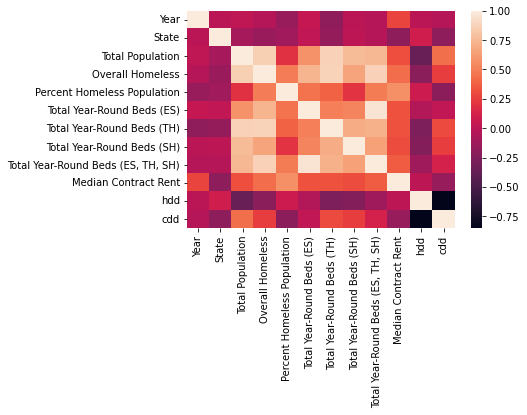

In [25]:
corr = state_code_res.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# ML Stuff

In [26]:
df_to_use=state_code_res
# Still missing Cols: Median sales price
df_to_use

,Year,State,Total Population,Overall Homeless,Percent Homeless Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
0,2010,1,4785437,6046,0.126342,1662,2525,34,4221,452,2936,2712
1,2011,1,4799069,5558,0.115814,1830,2633,34,4497,469,2232,2530
2,2012,1,4815588,5209,0.108170,2016,2247,34,4297,488,1749,2392
3,2013,1,4830081,4689,0.097079,1943,2095,34,4077,501,2204,2196
4,2014,1,4841799,4561,0.094201,1838,1852,34,3724,511,2668,2196
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2015,50,585613,798,0.136267,450,403,0,853,674,7853,515
496,2016,50,584215,857,0.146693,511,301,0,812,686,8181,605
497,2017,50,578931,873,0.150795,361,337,0,698,698,8354,576
498,2018,50,577601,639,0.110630,345,215,0,560,715,8668,568


In [27]:
df_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                500 non-null    int64  
 1   State                               500 non-null    int64  
 2   Total Population                    500 non-null    int64  
 3   Overall Homeless                    500 non-null    int64  
 4   Percent Homeless Population         500 non-null    float64
 5   Total Year-Round Beds (ES)          500 non-null    int64  
 6   Total Year-Round Beds (TH)          500 non-null    int64  
 7   Total Year-Round Beds (SH)          500 non-null    int64  
 8   Total Year-Round Beds (ES, TH, SH)  500 non-null    int64  
 9   Median Contract Rent                500 non-null    int64  
 10  hdd                                 500 non-null    int64  
 11  cdd                                 500 non-n

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Based on years(2010 to 2017 as train 2018 and 2019 as train) for each state. RandomForestClassifier

### Full Predictions

* Year
* State
* Total Population
* Total Year-Round Beds (ES)
* Total Year-Round Beds (TH)
* Total Year-Round Beds (SH)
* Total Year-Round Beds (ES, TH, SH)
* Median Contract Rent
* hdd
* cdd

In [29]:
blue = df_to_use[df_to_use.Year < 2018]
blue = blue.drop('Percent Homeless Population',axis=1)
#blue = blue.drop('State',axis=1)
#blue = blue.drop('Year',axis=1)
x_train = blue.drop('Overall Homeless',axis=1)
y_train = blue['Overall Homeless']
display(x_train)
display(y_train)

,Year,State,Total Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
0,2010,1,4785437,1662,2525,34,4221,452,2936,2712
1,2011,1,4799069,1830,2633,34,4497,469,2232,2530
2,2012,1,4815588,2016,2247,34,4297,488,1749,2392
3,2013,1,4830081,1943,2095,34,4077,501,2204,2196
4,2014,1,4841799,1838,1852,34,3724,511,2668,2196
...,...,...,...,...,...,...,...,...,...,...
493,2013,50,582122,596,309,0,905,647,8833,690
494,2014,50,582531,445,370,0,815,663,8660,426
495,2015,50,585613,450,403,0,853,674,7853,515
496,2016,50,584215,511,301,0,812,686,8181,605


0      6046
1      5558
2      5209
3      4689
4      4561
       ... 
493     953
494     757
495     798
496     857
497     873
Name: Overall Homeless, Length: 400, dtype: int64

In [30]:
red = df_to_use[df_to_use.Year > 2017]
red = red.drop('Percent Homeless Population',axis=1)
#red = red.drop('State',axis=1)
#red = red.drop('Year',axis=1)
display(red)
x_test = red.drop('Overall Homeless',axis=1)
y_test = red['Overall Homeless']
display(x_test)
display(y_test)

,Year,State,Total Population,Overall Homeless,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
8,2018,1,4887681,3434,2114,1040,34,3188,562,2258,2428
9,2019,1,4903185,3261,1937,730,34,2701,581,2086,2510
18,2018,2,735139,2016,1398,542,0,1940,1117,11618,65
19,2019,2,731545,1907,1374,504,0,1878,1126,11292,128
28,2018,3,7158024,9865,4058,2588,37,6683,843,3596,1391
...,...,...,...,...,...,...,...,...,...,...,...
479,2019,48,1792147,1397,1310,190,13,1513,536,4884,977
488,2018,49,5807406,4907,3190,1463,68,4721,703,7624,731
489,2019,49,5822434,4538,3179,1281,54,4514,724,7872,573
498,2018,50,577601,639,345,215,0,560,715,8668,568


,Year,State,Total Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
8,2018,1,4887681,2114,1040,34,3188,562,2258,2428
9,2019,1,4903185,1937,730,34,2701,581,2086,2510
18,2018,2,735139,1398,542,0,1940,1117,11618,65
19,2019,2,731545,1374,504,0,1878,1126,11292,128
28,2018,3,7158024,4058,2588,37,6683,843,3596,1391
...,...,...,...,...,...,...,...,...,...,...
479,2019,48,1792147,1310,190,13,1513,536,4884,977
488,2018,49,5807406,3190,1463,68,4721,703,7624,731
489,2019,49,5822434,3179,1281,54,4514,724,7872,573
498,2018,50,577601,345,215,0,560,715,8668,568


8      3434
9      3261
18     2016
19     1907
28     9865
       ... 
479    1397
488    4907
489    4538
498     639
499     548
Name: Overall Homeless, Length: 100, dtype: int64

In [31]:
forest = RandomForestClassifier(n_estimators=500, random_state=19)
forest.fit(x_train, y_train)
list(zip(forest.feature_names_in_,forest.feature_importances_))

[('Year', 0.0743792273311394),
 ('State', 0.06361461094374761),
 ('Total Population', 0.1121619617050986),
 ('Total Year-Round Beds (ES)', 0.11366610709136833),
 ('Total Year-Round Beds (TH)', 0.1141337257647563),
 ('Total Year-Round Beds (SH)', 0.0663965832176993),
 ('Total Year-Round Beds (ES, TH, SH)', 0.10719523518693293),
 ('Median Contract Rent', 0.11859394861418776),
 ('hdd', 0.11407312681802616),
 ('cdd', 0.11578547332704363)]

##Normal Prediction

In [32]:
print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.000


##Aprox prediction with deviation of 10%



In [33]:
preds = forest.predict(x_train)
display(preds)
display(y_train)

array([  6046,   5558,   5209,   4689,   4561,   3970,   4111,   3793,
         1863,   2128,   1913,   1946,   1784,   1956,   1940,   1845,
        13711,  10504,  11302,  10562,  10495,   9896,   9707,   8947,
         2762,   3424,   4214,   3812,   2936,   2560,   2463,   2467,
       123480, 125128, 120098, 118552, 113952, 115738, 118142, 131532,
        15482,  15116,  16768,   9754,  10028,   9953,  10550,  10940,
         4316,   4456,   4209,   4448,   4450,   4047,   3902,   3388,
          982,   1035,   1008,    946,    901,    953,   1070,    994,
        57551,  56687,  55170,  47862,  41542,  35900,  33559,  32190,
        19836,  20975,  20516,  16971,  16521,  13790,  12909,  10174,
         5834,   6188,   6246,   6335,   6918,   7620,   7921,   7220,
         2346,   2199,   1968,   1781,   2104,   1966,   2247,   2037,
        14395,  14009,  14144,  13425,  13107,  13177,  11590,  10798,
         6452,   6196,   6259,   6096,   5971,   5863,   5798,   5438,
      

0      6046
1      5558
2      5209
3      4689
4      4561
       ... 
493     953
494     757
495     798
496     857
497     873
Name: Overall Homeless, Length: 400, dtype: int64

In [34]:
pred = pd.Series(preds)
type(pred)

pandas.core.series.Series

Train Prediction

In [35]:
total = 0
y_train = y_train.reset_index(drop=True)
for i in range(len(pred)):
    if pred[i] > y_train[i]*0.9 and pred[i] < y_train[i]*1.1:
      total = total + 1
print(total/len(pred))

1.0


In [36]:
poi = forest.predict(x_test)
display(poi)
display(y_test)

array([  3793,   3793,   1845,   1845,   8947,   8947,   2463,   2467,
       131532, 131532,  10940,  10550,   3388,   3388,    994,    994,
        32190,  32190,  10174,  10174,   7220,   7220,   2037,   2037,
        10798,  10798,   5438,   5438,   2756,   2756,   2287,   2287,
         4025,   2287,   3305,   3305,   2280,   2280,   7247,   7247,
        17565,  17565,   9051,   9051,   7668,   7668,   1472,   1472,
         6037,   6037,   1529,   1529,   2501,   2501,   7833,   7833,
         1456,   1456,   8536,   8536,   2482,   2482,  89503,  89503,
         8962,   8962,    688,   2069,  10095,  10095,   4199,   4199,
        13953,  13953,  15333,  15333,   1180,   1180,   3916,   3916,
         1089,   1089,   8309,   8309,  23548,  23548,   2852,   2852,
         1225,   1225,   6067,   6067,  21112,  21112,   1309,   1309,
         5027,   5027,    873,    873])

8      3434
9      3261
18     2016
19     1907
28     9865
       ... 
479    1397
488    4907
489    4538
498     639
499     548
Name: Overall Homeless, Length: 100, dtype: int64

In [37]:
poi = pd.Series(poi)
type(poi)

pandas.core.series.Series

Test Prediction

In [38]:
total = 0
y_test = y_test.reset_index(drop=True)
for i in range(len(poi)):
    if poi[i] > y_test[i]*0.9 and poi[i] < y_test[i]*1.1:
      total = total + 1
print(total/len(poi))

0.71


#Based on years(2010 to 2017 as train 2018 and 2019 as train) for each state. RandomForestRegressor


### Full Predictions

* Year
* State
* Total Population
* Total Year-Round Beds (ES)
* Total Year-Round Beds (TH)
* Total Year-Round Beds (SH)
* Total Year-Round Beds (ES, TH, SH)
* Median Contract Rent
* hdd
* cdd

In [39]:
blue = df_to_use[df_to_use.Year < 2018]
blue = blue.drop('Percent Homeless Population',axis=1)
#blue = blue.drop('State',axis=1)
#blue = blue.drop('Year',axis=1)
x_train = blue.drop('Overall Homeless',axis=1)
y_train = blue['Overall Homeless']
display(x_train)
display(y_train)

,Year,State,Total Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
0,2010,1,4785437,1662,2525,34,4221,452,2936,2712
1,2011,1,4799069,1830,2633,34,4497,469,2232,2530
2,2012,1,4815588,2016,2247,34,4297,488,1749,2392
3,2013,1,4830081,1943,2095,34,4077,501,2204,2196
4,2014,1,4841799,1838,1852,34,3724,511,2668,2196
...,...,...,...,...,...,...,...,...,...,...
493,2013,50,582122,596,309,0,905,647,8833,690
494,2014,50,582531,445,370,0,815,663,8660,426
495,2015,50,585613,450,403,0,853,674,7853,515
496,2016,50,584215,511,301,0,812,686,8181,605


0      6046
1      5558
2      5209
3      4689
4      4561
       ... 
493     953
494     757
495     798
496     857
497     873
Name: Overall Homeless, Length: 400, dtype: int64

In [40]:
red = df_to_use[df_to_use.Year > 2017]
red = red.drop('Percent Homeless Population',axis=1)
#red = red.drop('State',axis=1)
#red = red.drop('Year',axis=1)
display(red)
x_test = red.drop('Overall Homeless',axis=1)
y_test = red['Overall Homeless']
display(x_test)
display(y_test)

,Year,State,Total Population,Overall Homeless,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
8,2018,1,4887681,3434,2114,1040,34,3188,562,2258,2428
9,2019,1,4903185,3261,1937,730,34,2701,581,2086,2510
18,2018,2,735139,2016,1398,542,0,1940,1117,11618,65
19,2019,2,731545,1907,1374,504,0,1878,1126,11292,128
28,2018,3,7158024,9865,4058,2588,37,6683,843,3596,1391
...,...,...,...,...,...,...,...,...,...,...,...
479,2019,48,1792147,1397,1310,190,13,1513,536,4884,977
488,2018,49,5807406,4907,3190,1463,68,4721,703,7624,731
489,2019,49,5822434,4538,3179,1281,54,4514,724,7872,573
498,2018,50,577601,639,345,215,0,560,715,8668,568


,Year,State,Total Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
8,2018,1,4887681,2114,1040,34,3188,562,2258,2428
9,2019,1,4903185,1937,730,34,2701,581,2086,2510
18,2018,2,735139,1398,542,0,1940,1117,11618,65
19,2019,2,731545,1374,504,0,1878,1126,11292,128
28,2018,3,7158024,4058,2588,37,6683,843,3596,1391
...,...,...,...,...,...,...,...,...,...,...
479,2019,48,1792147,1310,190,13,1513,536,4884,977
488,2018,49,5807406,3190,1463,68,4721,703,7624,731
489,2019,49,5822434,3179,1281,54,4514,724,7872,573
498,2018,50,577601,345,215,0,560,715,8668,568


8      3434
9      3261
18     2016
19     1907
28     9865
       ... 
479    1397
488    4907
489    4538
498     639
499     548
Name: Overall Homeless, Length: 100, dtype: int64

In [41]:
forest = RandomForestRegressor(n_estimators=50, random_state=9)
forest.fit(x_train, y_train)
list(zip(forest.feature_names_in_,forest.feature_importances_))

[('Year', 0.001239412650369836),
 ('State', 0.013685192870053424),
 ('Total Population', 0.027478345603074633),
 ('Total Year-Round Beds (ES)', 0.1569654674012844),
 ('Total Year-Round Beds (TH)', 0.08932777026170567),
 ('Total Year-Round Beds (SH)', 0.001124720867709864),
 ('Total Year-Round Beds (ES, TH, SH)', 0.6770803429067844),
 ('Median Contract Rent', 0.022889306169202487),
 ('hdd', 0.0036439118044484307),
 ('cdd', 0.006565529465366914)]

##Normal Prediction

In [42]:
print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.942


#EXTRA 
Normal data division version (Train_test_split)

### Minimal Predictions

* Total Population
* Total Year-Round Beds (ES)
* Total Year-Round Beds (TH)
* Total Year-Round Beds (SH)
* Total Year-Round Beds (ES, TH, SH)
* Median Contract Rent
* hdd
* cdd

In [43]:
temp = df_to_use.drop('Percent Homeless Population', axis=1)
temp = temp.drop('State',axis =1)
temp = temp.drop('Year',axis =1)
a = temp.drop('Overall Homeless',axis=1)
display(a.head(25))

,Total Population,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Year-Round Beds (ES, TH, SH)",Median Contract Rent,hdd,cdd
0,4785437,1662,2525,34,4221,452,2936,2712
1,4799069,1830,2633,34,4497,469,2232,2530
2,4815588,2016,2247,34,4297,488,1749,2392
3,4830081,1943,2095,34,4077,501,2204,2196
4,4841799,1838,1852,34,3724,511,2668,2196
5,4852347,1868,1711,34,3613,520,2110,2360
6,4863525,1912,1543,34,3489,533,2009,2576
7,4874486,2073,1334,37,3444,544,1860,2331
8,4887681,2114,1040,34,3188,562,2258,2428
9,4903185,1937,730,34,2701,581,2086,2510


In [44]:
b = df_to_use['Overall Homeless']
display(b)

0      6046
1      5558
2      5209
3      4689
4      4561
       ... 
495     798
496     857
497     873
498     639
499     548
Name: Overall Homeless, Length: 500, dtype: int64

In [45]:
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size = 0.2, shuffle=True, random_state=78)

In [46]:
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)

(400, 8)
(100, 8)
(400,)
(100,)


In [47]:
forests = RandomForestClassifier(n_estimators=500, random_state=6)
forests.fit(a_train, b_train)

RandomForestClassifier(n_estimators=500, random_state=6)

In [48]:
list(zip(forests.feature_names_in_,forests.feature_importances_))

[('Total Population', 0.13223693231076344),
 ('Total Year-Round Beds (ES)', 0.1295872871194399),
 ('Total Year-Round Beds (TH)', 0.13172736529023896),
 ('Total Year-Round Beds (SH)', 0.08234434004761378),
 ('Total Year-Round Beds (ES, TH, SH)', 0.12979412757835668),
 ('Median Contract Rent', 0.13486473983847794),
 ('hdd', 0.13092406921102076),
 ('cdd', 0.12852113860408848)]

##Normal Prediction

In [49]:
print("Accuracy on training set: {:.3f}".format(forests.score(a_train, b_train)))
print("Accuracy on test set: {:.3f}".format(forests.score(a_test, b_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.000


##Distance prediction with deviation of 10%

In [50]:
preds = forests.predict(a_train)
display(preds)
display(b_train)

array([  1956,   2516,   7243,   1496,   4214,   1907,   2482,   1523,
        12592,   5209,   8582,  10237,   1277,  15116,   3933,   8743,
        63445,   6259,  10208,   1445, 129972,  13737,   1117,  21577,
         1574,   6179,   1309,   1160,   1454,  15482,   2381,   3134,
         1940,   6104,  32190,    731,  19836,    826,    953,   4025,
       125128,  23678,   8895,   4625,   2287,  10798,   8122,   2346,
         6544,   1282,   6037,   1190,   2807,   1784,    982,  35121,
         1768,  13177, 118142,  89503,   1396,   5785,   2413,  28328,
         9953,   9896,   2501,  13226,   3081,  22304,  12325,   2936,
        13238,   2819,  15086,  17565,  13199,   1405,   3084,  14736,
         9707,   9150,  17254,  10249,  21237,   2756,   1072,   4907,
         1863,   1781,   9865,   7856,   1529,  25310,  10028,   2403,
         7921, 113952,   6027,  35900,   2372,   7883,  17760,   4561,
        15876,  11671,   5783,   4538,   8214,    639,  10199,  10098,
      

15       1956
188      2516
228      7243
282      1496
32       4214
        ...  
105      7620
40     123480
407       943
470      2264
197      7247
Name: Overall Homeless, Length: 400, dtype: int64

In [51]:
predicts = pd.Series(preds)
type(predicts)

pandas.core.series.Series

In [52]:
total = 0
b_train = b_train.reset_index(drop=True)
for i in range(len(predicts)):
    if predicts[i] > b_train[i] * 0.9 and predicts[i] < b_train[i]*1.1:
      total = total + 1
print(total/len(predicts))

1.0


In [53]:
pred = forests.predict(a_test)
display(pred)
display(b_test)

array([  2410, 118142,    603,   1352,   8205,    603,   2393,   5438,
         5245,    639,  10174,   2280,  13185,   1450,  17501,  20068,
        55170,  13025,   3122,   6623,   4450,   3424,  19419,   8309,
         2287,   6104,   6179,   3902,  11527,   4079,   1966,  12191,
         9051,   7744,   7668,   7001,   9426,  21135,   3084,   5785,
          857,  11823,  20439,  10237,    885,   4907,   9051,   9314,
         3122,   2726,    953,   5971,   1160,   4199,   7856,  13025,
          798,   1008,   2928,   2280,    923,  11302,   8309,   1376,
        11527,   4199,   3970,  16971,   9953,  21237,    857,   2346,
         7744,   9051,  13790,   1397,  77430,   9291,   3122,   3976,
         7668,   6194,   4209,   2754,   2482,  19836,   4408,   2482,
         8582,  10562,   7001,   7282,   2941,   3970,   8424,   9314,
         1781,  11302,   1055,  10095])

471      2211
45     115738
333      2069
239      1184
192      9454
        ...  
327      8962
112      1968
21      10504
388      1101
346     10404
Name: Overall Homeless, Length: 100, dtype: int64

In [54]:
type(pred)

numpy.ndarray

In [55]:
type(b_test)

pandas.core.series.Series

In [56]:
predict = pd.Series(pred)
type(predict)

pandas.core.series.Series

In [57]:
total = 0
b_test = b_test.reset_index(drop=True)
for i in range(len(predict)):
    if predict[i] > b_test[i] * 0.9 and predict[i] < b_test[i]*1.1:
      total = total + 1
print(total/len(predict))

0.7
